### pH titration

The following script uses the Henderson-Hasselbalch equation, $pH = pKa + log_{10}\frac{[NH_2]}{[NH_3^+]}$,  to calculate and plot the protonated fraction (0.0 &ndash; 1.0)  of a titratable group with a certain `pKa` value as a function of pH. Different titration curves can be calculated by changing the `pka` variable in the code.

| Molecule | pKa | 
| --- | --- | 
| DNA | 2.0 |
| Chitosan | 6.5 |
| Spermine | 10.4 |

For an amine group, the protonated fraction, $f_{NH_3^+}$, is defined as follows:

$R$&mdash;$NH_2 + H^+$ &rlarr; $R$&mdash;$NH_3^+$

$f_{NH_3^+} = \frac{[NH_3^+]}{[NH_3^+]+[NH_2]}$ 

$f_{NH_3^+} = \frac{1}{1+\frac{[NH_2]}{[NH_3^+]}}$ 

$f_{NH_3^+} = \frac{1}{1+10^{pH-pKa}}$ 



*Remember to execute in each cell by clicking the "Run" button *

In [2]:
# First we import necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# This is form of the Henderson-Hasselbalch equation calculates the protonation degree
# at different pH values, for a given pKa value
def HH(pH,pKa):
    return 1/(1+10**(pH-pKa))

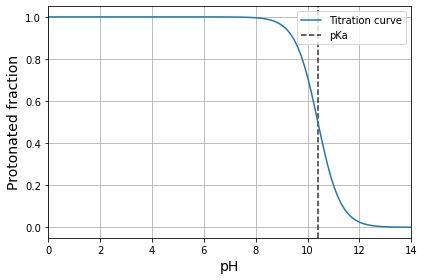

In [4]:
# Here we define the pKa value
pKa = 10.4

# Create the pH scale from 0 to 14, with 100 linearly spaced pH values
pH = np.linspace(0,14,num=100)

# And we plot pH vs protonated fraction
plt.plot(pH,HH(pH,pKa), label="Titration curve" )
plt.vlines(pKa,-0.05,1.05,color='k',linestyles='dashed',alpha=0.8, label='pKa')
plt.ylim(-0.05,1.05)
plt.xlim(0,14)
plt.xlabel('pH', fontsize=14)
plt.ylabel('Protonated fraction', fontsize=14)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

The titration curve above allows tells us something about the charge of a single titratable group at different pH values. However, when forming DNA nanoparticles with a positively charged polysaccharide, there are two components:
1. The amine group of chitosan or spermine
2. The phosphate group of DNA

Therefore, we need to take both of them into account and plot the ratio between the positive charge to negative charge in order to find the pH range that gives us the optimal ratio of 0.35 &ndash; 0.8. The script below does exactly this. You can change the `pKa_amine` varialbe to see what the positive-to-negative charge ratio would be for another amine.

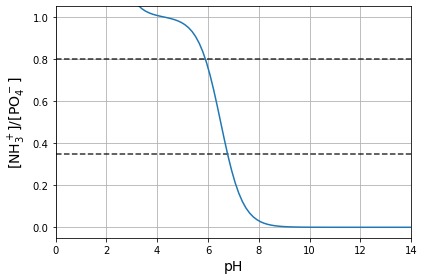

The nanoparticles will likely be stable at pH = 5.9-6.6


In [5]:
# Here we define the pKa values
# pKa_DNA is the pkA value for DNA
# pka_amine is the pKa value for the amine (chitosan, spermine, etc.)
pKa_DNA = 2.0
pKa_amine = 6.5

# Here the amount of negative and positive charge for each component are calculated
DNA_neg = 1 - HH(pH,pKa_DNA)
amine_pos = HH(pH,pKa_amine)

# And we plot pH vs positive/negative ratio
plt.plot(pH,amine_pos/DNA_neg)
plt.hlines(0.35,0,14,color='k',linestyles='dashed',alpha=0.8)
plt.hlines(0.80,0,14,color='k',linestyles='dashed',alpha=0.8)
plt.ylim(-0.05,1.05)
plt.xlim(0,14)
plt.xlabel('pH', fontsize=14)
plt.ylabel('[NH$_3^+$]/[PO$_4^-$]', fontsize=14)
plt.tight_layout()
plt.grid()
plt.show()

# Find the pH range that where the positive/negative ratio is between 0.35 and 0.8
x = np.where((amine_pos/DNA_neg >= 0.35) & (amine_pos/DNA_neg <= 0.8))[0]
print('The nanoparticles will likely be stable at pH = {:.1f}-{:.1f}'.format(pH[x[0]],pH[x[-1]]))

#### Would chitosan or spermine be more suitable in physiological conditions?